In [1]:
import pandas as pd
import os 
import numpy as np
import datetime as dt 
import seaborn as sns
import matplotlib.pyplot as plt
import mlflow
import nbformat
import sklearn
import plotly

In [2]:
project_path = os.getcwd()
doc_path = os.path.join(project_path, "dataset")
fichiers = os.listdir(doc_path)

cutsomers = pd.read_csv(os.path.join(doc_path, fichiers[0]))
geolocalisation = pd.read_csv(os.path.join(doc_path, fichiers[1]))
orders_dataset = pd.read_csv(os.path.join(doc_path, fichiers[2]))
order_items = pd.read_csv(os.path.join(doc_path, fichiers[3]))
order_payment = pd.read_csv(os.path.join(doc_path, fichiers[4]))
orders_reviews = pd.read_csv(os.path.join(doc_path, fichiers[5]))
products = pd.read_csv(os.path.join(doc_path, fichiers[6]))
sellers = pd.read_csv(os.path.join(doc_path, fichiers[7]))
product_category_name_transalation = pd.read_csv(os.path.join(doc_path, fichiers[8]))

# Data Preprocessing 

In [3]:
customer_orders = pd.merge(orders_dataset, cutsomers, on = "customer_id", how = "inner")
customer_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [4]:
customer_orders.groupby("customer_unique_id").agg({"order_id": "count"}).sort_values(by = "order_id", ascending = False).head(100)

,order_id
customer_unique_id,
8d50f5eadf50201ccdcedfb9e2ac8455,17
3e43e6105506432c953e165fb2acf44c,9
6469f99c1f9dfae7733b25662e7f1782,7
ca77025e7201e3b30c44b472ff346268,7
1b6c7548a2a1f9037c1fd3ddfed95f33,7
...,...
51d91326ffc0688da14a001de38c264b,3
c6df3869c263531ebd51f0454a353605,3
ef0103e9602d12594d19c2b666219bc1,3


In [5]:
only_unique_customers = customer_orders[customer_orders.groupby('customer_unique_id').customer_unique_id.transform('count')>1].copy() 
display(only_unique_customers.head())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
15,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04 00:00:00,ccafc1c3f270410521c3c6f3b249870f,74820,goiania,GO
16,403b97836b0c04a622354cf531062e5f,738b086814c6fcc74b8cc583f8516ee3,delivered,2018-01-02 19:00:43,2018-01-02 19:09:04,2018-01-03 18:19:09,2018-01-20 01:38:59,2018-02-06 00:00:00,6e26bbeaa107ec34112c64e1ee31c0f5,21381,rio de janeiro,RJ
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00,08fb46d35bb3ab4037202c23592d1259,13215,jundiai,SP
46,d17dc4a904426827ca80f2ccb3a6be56,569cf68214806a39acc0f39344aea67f,delivered,2017-05-14 20:28:25,2017-05-14 20:42:45,2017-05-16 08:17:46,2017-05-25 09:14:31,2017-06-12 00:00:00,c2551ea089b7ebbc67a2ea8757152514,44380,cruz das almas,BA


In [6]:
only_unique_customers.groupby("customer_unique_id").agg({"order_id": "count"}).sort_values(by = "order_id", ascending = False).head(100)

,order_id
customer_unique_id,
8d50f5eadf50201ccdcedfb9e2ac8455,17
3e43e6105506432c953e165fb2acf44c,9
1b6c7548a2a1f9037c1fd3ddfed95f33,7
6469f99c1f9dfae7733b25662e7f1782,7
ca77025e7201e3b30c44b472ff346268,7
...,...
e9b87dccd9c326a3325385087eb0150c,3
ae20947231d4d44dde1680a7ab14d90a,3
93360190b9375a40b65720ee99387a4a,3


In [7]:
def get_month(x): return dt.datetime(x.year, x.month, 1)

In [8]:
only_unique_customers['order_purchase_timestamp'] = pd.to_datetime(only_unique_customers['order_purchase_timestamp'])

In [9]:
only_unique_customers['InvoiceDate'] = [d.date() for d in only_unique_customers["order_purchase_timestamp"]]

In [10]:
print('min:{}; Max:{}'.format(min(only_unique_customers['InvoiceDate']), max(only_unique_customers['InvoiceDate'])))

min:2016-10-03; Max:2018-10-16


In [11]:
snapshot_date = max(only_unique_customers['InvoiceDate']) + dt.timedelta(days=1)

In [12]:
order_customer_paiement = pd.merge(only_unique_customers, order_payment,  on = "order_id", how = "inner")

In [13]:
order_customer_paiement_review = pd.merge(order_customer_paiement, orders_reviews,  on = "order_id", how = "inner")

In [14]:
order_customer_paiement_review.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,3,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2,voucher,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04 00:00:00,ccafc1c3f270410521c3c6f3b249870f,74820,...,1,credit_card,10,146.45,5a8608437f4b52bec5cd143f37258b5e,5,Nota dez,Obrigado pela atenção. Lojas lannister perfeit...,2018-07-03 00:00:00,2018-07-03 15:10:07
4,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00,08fb46d35bb3ab4037202c23592d1259,13215,...,1,boleto,1,22.36,5853e27c64b89e222c5e4edf78bec3d4,1,NaN,NaN,2018-07-01 00:00:00,2018-07-11 20:41:18


## Get RFM values

In [15]:
data = order_customer_paiement_review.groupby(['customer_unique_id']).agg({'InvoiceDate': lambda x: (snapshot_date - x.max()).days,"order_id": "count", "payment_value": "sum", "review_score": "mean", "review_comment_message": lambda x: np.mean(len(x)), "payment_installments": "mean"})

In [16]:
data.head()

,InvoiceDate,order_id,payment_value,review_score,review_comment_message,payment_installments
customer_unique_id,,,,,,
00172711b30d52eea8b313a7f2cced02,65,2,244.14,4.000000,2.0,1.5
004288347e5e88a27ded2bb23747066c,276,2,354.37,5.000000,2.0,2.0
004b45ec5c64187465168251cd1c9c2f,144,2,147.72,3.000000,2.0,1.0
0058f300f57d7b93c477a131a59b36c3,209,3,175.58,3.666667,3.0,1.0
00a39521eb40f7012db50455bf083460,136,2,123.25,4.000000,2.0,1.0


In [17]:
data.rename(columns = {'InvoiceDate': 'Recency', 'order_id': 'Frequency', 'payment_value': 'MonetaryValue'}, inplace = True)

In [18]:
data.head()

,Recency,Frequency,MonetaryValue,review_score,review_comment_message,payment_installments
customer_unique_id,,,,,,
00172711b30d52eea8b313a7f2cced02,65,2,244.14,4.000000,2.0,1.5
004288347e5e88a27ded2bb23747066c,276,2,354.37,5.000000,2.0,2.0
004b45ec5c64187465168251cd1c9c2f,144,2,147.72,3.000000,2.0,1.0
0058f300f57d7b93c477a131a59b36c3,209,3,175.58,3.666667,3.0,1.0
00a39521eb40f7012db50455bf083460,136,2,123.25,4.000000,2.0,1.0


In [19]:
r_labels = [4,3,2,1]
f_labels = [1,2,3,4]
m_labels = [1,2,3,4]

In [20]:
r_quartiles = pd.qcut(data['Recency'], q=4, labels=r_labels, duplicates='drop')


In [21]:
f_quartiles = pd.qcut(data.Frequency.rank(method='first'), 4, labels=f_labels)
print(f_quartiles)

customer_unique_id
00172711b30d52eea8b313a7f2cced02    1
004288347e5e88a27ded2bb23747066c    1
004b45ec5c64187465168251cd1c9c2f    1
0058f300f57d7b93c477a131a59b36c3    4
00a39521eb40f7012db50455bf083460    1
                                   ..
ff36be26206fffe1eb37afd54c70e18b    4
ff44401d0d8f5b9c54a47374eb48c1b8    4
ff8892f7c26aa0446da53d01b18df463    4
ff922bdd6bafcdf99cb90d7f39cea5b3    4
ffe254cc039740e17dd15a5305035928    4
Name: Frequency, Length: 2988, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]


In [22]:
m_quartiles = pd.qcut(data['MonetaryValue'], q=4, labels=m_labels)

In [23]:
data = data.assign(R = r_quartiles.values, F = f_quartiles.values, M = m_quartiles.values)

In [24]:
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])


In [25]:
data['RFM_segment'] = data.apply(join_rfm, axis=1)
data["RFM_score"] = data[["R", "F", "M"]].sum(axis=1)
data.head()

,Recency,Frequency,MonetaryValue,review_score,review_comment_message,payment_installments,R,F,M,RFM_segment,RFM_score
customer_unique_id,,,,,,,,,,,
00172711b30d52eea8b313a7f2cced02,65,2,244.14,4.000000,2.0,1.5,4,1,3,4.01.03.0,8
004288347e5e88a27ded2bb23747066c,276,2,354.37,5.000000,2.0,2.0,2,1,3,2.01.03.0,6
004b45ec5c64187465168251cd1c9c2f,144,2,147.72,3.000000,2.0,1.0,4,1,1,4.01.01.0,6
0058f300f57d7b93c477a131a59b36c3,209,3,175.58,3.666667,3.0,1.0,3,4,2,3.04.02.0,9
00a39521eb40f7012db50455bf083460,136,2,123.25,4.000000,2.0,1.0,4,1,1,4.01.01.0,6


In [26]:
data.groupby('RFM_score').agg({'Recency': 'mean', 'Frequency': 'mean', 'MonetaryValue': ['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_score                                      
3           475.6       1.9         101.1    51
4           411.5       1.9         127.5   145
5           359.8       2.0         161.7   303
6           319.7       2.1         213.7   480
7           274.2       2.3         260.0   525
8           249.6       2.4         348.7   530
9           218.2       2.6         432.6   453
10          186.4       2.7         540.3   277
11          151.4       3.2         581.2   159
12           95.3       3.9         938.6    65

In [27]:
def segment_me(df):
    if df['RFM_score'] >= 9:
        return 'Gold'
    elif ((df['RFM_score'] >= 8) and (df['RFM_score'] < 9)):
        return 'Silver'
    else:
        return 'Bronze'


In [28]:
data['General_Segment'] = data.apply(segment_me, axis=1)
data.groupby('General_Segment').agg({'Recency': 'mean', 'Frequency': 'mean', 'MonetaryValue': ['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Bronze            326.0       2.1         207.3  1504
Gold              189.5       2.8         523.1   954
Silver            249.6       2.4         348.7   530

In [29]:
RFM = data[['Recency', 'Frequency', 'MonetaryValue']]
data_predict = data[['Recency', 'Frequency', 'MonetaryValue', 'review_score', 'review_comment_message', 'payment_installments']]


## Change variables for more symetrie and centering and scaling

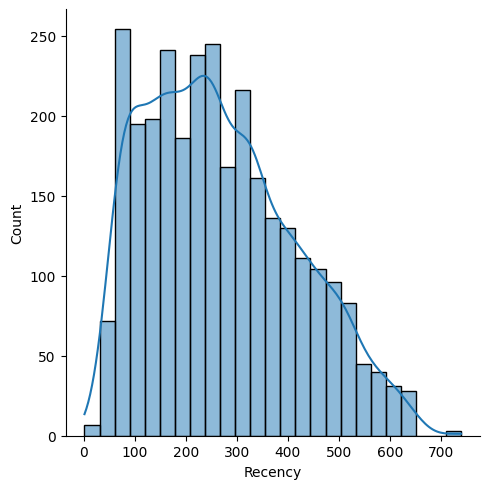

In [30]:
sns.displot(data['Recency'], kde=True)
plt.show()

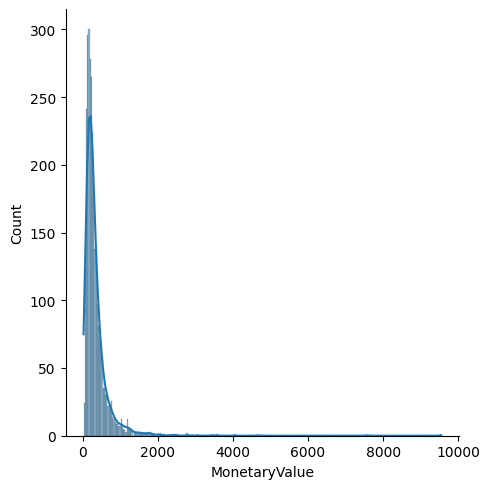

In [31]:
sns.displot(data['MonetaryValue'], kde=True)
plt.show()

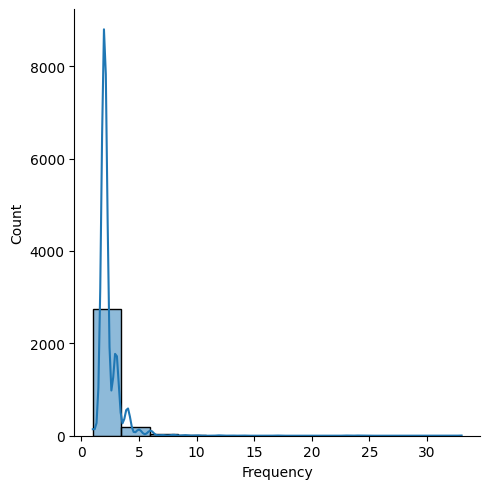

In [32]:
sns.displot(data['Frequency'], kde=True)
plt.show()

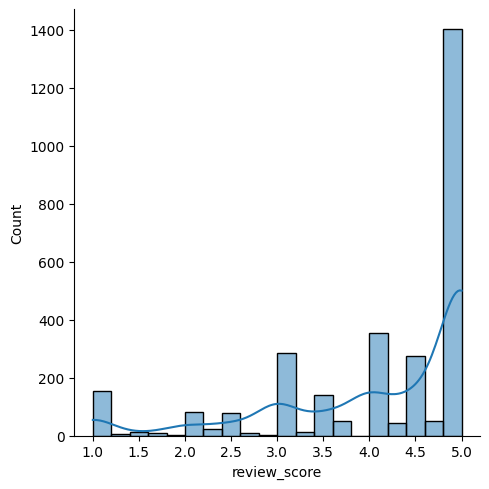

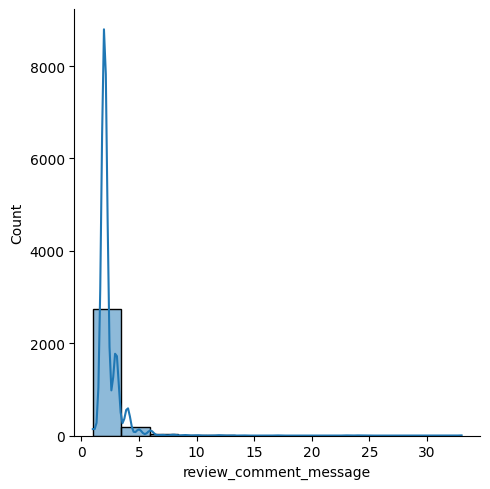

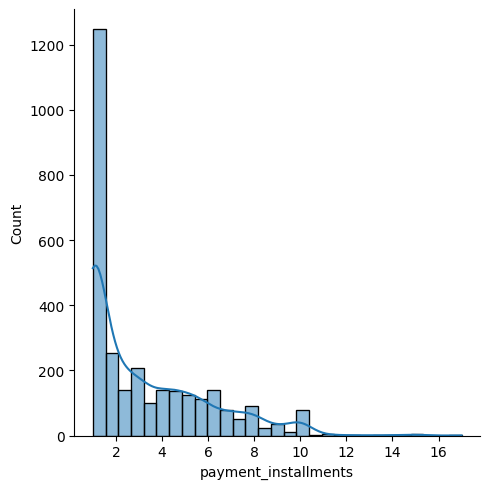

In [33]:
sns.displot(data['review_score'], kde=True)
sns.displot(data['review_comment_message'], kde=True)
sns.displot(data['payment_installments'], kde=True)


In [34]:
#unskew data
frequency_log = np.log(data['Frequency'])
monetary_log = np.log(data['MonetaryValue'])
recency_log = np.log(data['Recency'])
review_score_log = np.log(data['review_score'])
review_message_log = np.log(data['review_comment_message'])
payment_installments_log = np.log(data['payment_installments'])


In [35]:
data['Frequency'] = frequency_log
data['MonetaryValue'] = monetary_log
data['Recency'] = recency_log
data['review_score'] = review_score_log
data['review_comment_message'] = review_message_log
data['payment_installments'] = payment_installments_log

In [36]:
data_RFM = data[['Recency', 'Frequency', 'MonetaryValue', 'RFM_score', 'payment_installments', 'review_score','review_comment_message', 'General_Segment']]
RFM = data_RFM[['Recency', 'Frequency', 'MonetaryValue', 'payment_installments', 'review_score', 'review_comment_message']]


In [37]:
from sklearn.preprocessing import StandardScaler

#center and scale data
scaler = StandardScaler()
scaler.fit(RFM)

#store for clustering
data_scaled = scaler.transform(RFM)
print('mean:', data_scaled.mean(axis=0).round(2))
print('std:', data_scaled.std(axis=0).round(2))

mean: [-0.  0.  0.  0. -0.  0.]
std: [1. 1. 1. 1. 1. 1.]


# Started clustering experiments

In [ ]:
mlflow.tracking.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("Eclient segmentation")



2023/04/09 17:59:10 INFO mlflow.tracking.fluent: Experiment with name 'Eclient segmentation' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/377592725585441763', creation_time=1681055950959, experiment_id='377592725585441763', last_update_time=1681055950959, lifecycle_stage='active', name='Eclient segmentation', tags={}>

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k).fit(data_scaled)
    RFM["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center


c:\Users\litle\repos\eclient_segmentation\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\litle\AppData\Local\Temp\ipykernel_26884\361126633.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM["clusters"] = kmeans.labels_
c:\Users\litle\repos\eclient_segmentation\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\litle\AppData\Local\Temp\ipykernel_26884\361126633.py:7: SettingWithCopyWarning: 
A 

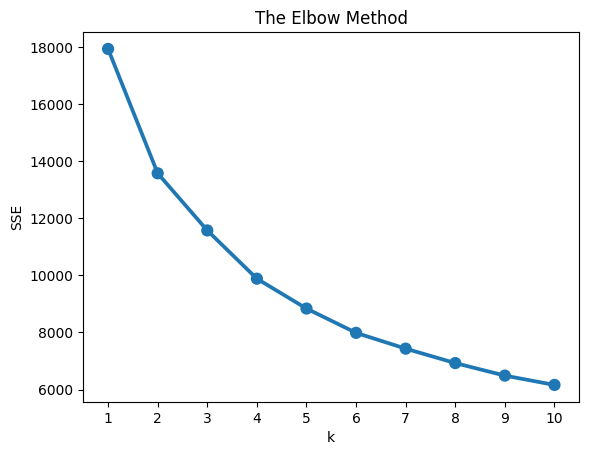

In [ ]:
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [ ]:
for i in [2,3, 4, 5]:
    name = 'Kmeans' + str(i)
    with mlflow.start_run(run_name=name):
        kmeans = KMeans(n_clusters= i, random_state = 1).fit(data_scaled)
        cluster_labels = kmeans.labels_
        mlflow.log_metric("silhouette_score", silhouette_score(data_scaled, cluster_labels))
        mlflow.log_param("n_clusters", i)
        mlflow.log_param("random_state", 1)
        mlflow.sklearn.log_model(kmeans, artifact_path= name, registered_model_name="kmeans")
        mlflow.end_run()
    
    


c:\Users\litle\repos\eclient_segmentation\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\litle\repos\eclient_segmentation\.venv\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Successfully registered model 'kmeans'.
2023/04/09 17:59:33 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: kmeans, version 1
Created version '1' of model 'kmeans'.
c:\Users\litle\repos\eclient_segmentation\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Registered model 'kmeans

In [ ]:
from sklearn.cluster import MeanShift
for i in [200, 400, 600, 800]:
    name = 'nameshift' + str(i)
    with mlflow.start_run(run_name=name):
        mean_shift = MeanShift(max_iter = i, n_jobs= - 1).fit(data_scaled)
        cluster_labels = mean_shift.labels_
        mlflow.log_metric("silhouette_score", silhouette_score(data_scaled, cluster_labels))
        mlflow.log_param("max_iter", i)
        mlflow.log_param("n_jobs", -1)
        mlflow.log_param("n_clusters", len(np.unique(cluster_labels)))
        mlflow.sklearn.log_model(mean_shift, artifact_path= name, registered_model_name="mean_shift")
        mlflow.end_run()

Successfully registered model 'mean_shift'.
2023/04/09 18:00:33 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: mean_shift, version 1
Created version '1' of model 'mean_shift'.
Registered model 'mean_shift' already exists. Creating a new version of this model...
2023/04/09 18:00:53 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: mean_shift, version 2
Created version '2' of model 'mean_shift'.
Registered model 'mean_shift' already exists. Creating a new version of this model...
2023/04/09 18:01:12 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: mean_shift, version 3
Created version '3' of model 'mean_shift'.
Registered model 'mean_shift' already exists. Creating a new version of this model...
2023/04/09 18:01:29 

In [ ]:
from sklearn.cluster import DBSCAN
max_distance = [0.1, 0.2, 0.3, 0.4]
min_samples = [2, 3, 4, 5]
for i in max_distance:
    for j in min_samples:
        name = 'DBSCAN' + str(i) + str(j)
        with mlflow.start_run(run_name=name):
            dbscan = DBSCAN(eps = i, min_samples = j).fit(data_scaled)
            cluster_labels = dbscan.labels_
            mlflow.log_metric("silhouette_score", silhouette_score(data_scaled, cluster_labels))
            mlflow.log_param("eps", i)
            mlflow.log_param("min_samples", j)
            mlflow.log_param("n_clusters", len(np.unique(cluster_labels)))
            mlflow.sklearn.log_model(dbscan, artifact_path= name, registered_model_name="dbscan")
            mlflow.end_run()
        
        



2023/04/09 18:01:30 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Successfully registered model 'dbscan'.
2023/04/09 18:01:36 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: dbscan, version 1
Created version '1' of model 'dbscan'.
2023/04/09 18:01:37 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'dbscan' already exists. Creating a new version of this model...
2023/04/09 18:01:43 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: dbscan, version 2
Created version '2' of model 'dbscan'.
2023/04/09 18:01:43 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'dbscan' already exists. Creating a new version of this model...
2023/04/0

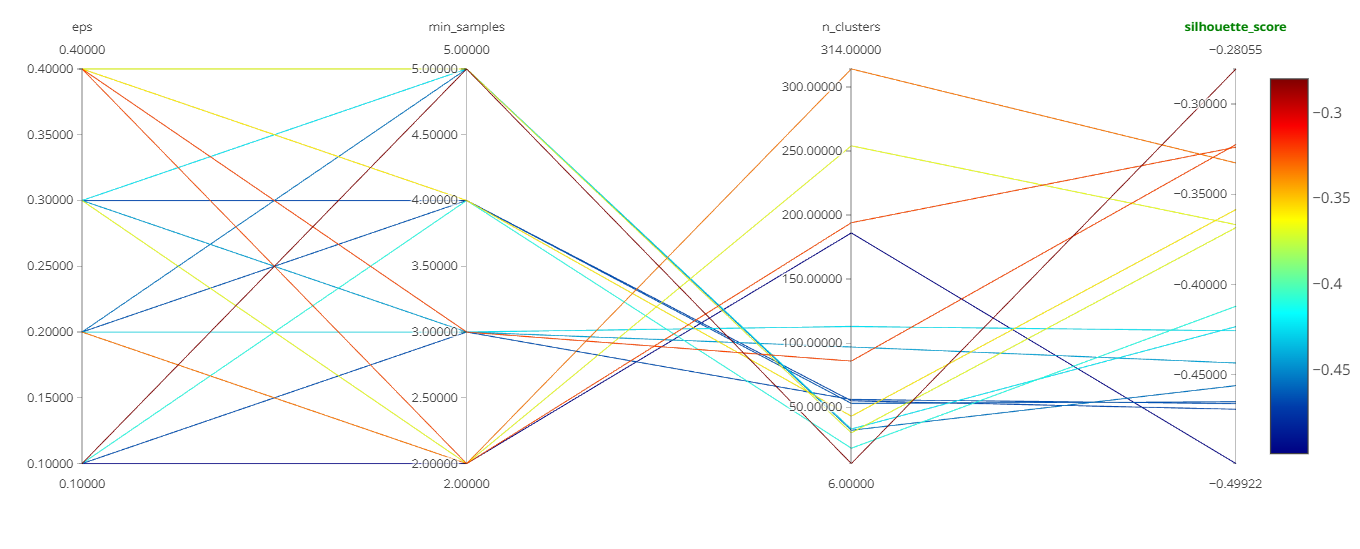

In [38]:
runs = mlflow.search_runs(experiment_names= ["Eclient segmentation"] ).sort_values("metrics.silhouette_score", ascending=False).head(5)
top_models = runs[['tags.mlflow.runName', 'metrics.silhouette_score', 'params.n_clusters']]


In [42]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters= 4).fit(data_scaled)
clusters = model.predict(data_scaled)
data_RFM['clusters'] = clusters
print(data_RFM['clusters'].value_counts())
data['clusters'] = clusters



clusters
1    1154
0     947
2     641
3     246
Name: count, dtype: int64


c:\Users\litle\repos\eclient_segmentation\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\litle\AppData\Local\Temp\ipykernel_19244\2909367387.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [102]:
import plotly.graph_objects as go

PLOT = go.Figure()

for C in list(data.clusters.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = data[data.clusters == C]['Recency'],
                                z = data[data.clusters == C]['Frequency'],
                                y = data[data.clusters == C]['MonetaryValue'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(C)))


PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Recency', titlefont_color = 'black'),
                                zaxis=dict(title = 'Frequency', titlefont_color = 'black'),
                                yaxis=dict(title = 'MonetaryValue', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12),
                   margin = dict(l = 0, r = 30, b = 0, t = 0))



In [46]:
data.groupby('clusters').agg({'Recency': 'mean', 'Frequency': 'mean', 'MonetaryValue': ['mean', 'sum'], 'review_score': ['mean', 'count'], 'review_comment_message': ['mean', 'count'], 'payment_installments': ['mean', 'count']}).round(3)

Recency Frequency MonetaryValue           review_score         
            mean      mean          mean       sum         mean count   
clusters                                                                
0          5.460     0.686         5.722  5418.369        1.445   947  \
1          5.329     0.686         5.148  5940.249        1.469  1154   
2          5.526     1.267         5.823  3732.462        1.432   641   
3          5.400     0.760         5.577  1371.949        0.246   246   

         review_comment_message       payment_installments        
                           mean count                 mean count  
clusters                                                          
0                         0.686   947                1.611   947  
1                         0.686  1154                0.267  1154  
2                         1.267   641                0.857   641  
3                         0.760   246                0.843   246

## Meanshift algo

In [48]:
from sklearn.cluster import MeanShift
model = MeanShift().fit(data_scaled)
clusters = model.predict(data_scaled)
data_RFM['clusters'] = clusters
print(data_RFM['clusters'].value_counts())
data['clusters'] = clusters



clusters
0    2896
1      30
4      25
5      20
3      10
2       6
6       1
Name: count, dtype: int64


C:\Users\litle\AppData\Local\Temp\ipykernel_19244\897741874.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [110]:
import plotly.graph_objects as go

PLOT = go.Figure()

for C in list(data.clusters.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = data[data.clusters == C]['Recency'],
                                y = data[data.clusters == C]['Frequency'],
                                z = data[data.clusters == C]['MonetaryValue'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(C)))


PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Recency', titlefont_color = 'black'),
                                yaxis=dict(title = 'Frequency', titlefont_color = 'black'),
                                zaxis=dict(title = 'MonetaryValue', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))


PLOT.update_yaxes(automargin=True)
PLOT.update_xaxes(automargin=True)



In [111]:
import plotly.graph_objects as go

PLOT = go.Figure()

for C in list(data.clusters.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = data[data.clusters == C]['payment_installments'],
                                y = data[data.clusters == C]['review_score'],
                                z = data[data.clusters == C]['review_comment_message'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(C)))


PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'payment_installments', titlefont_color = 'black'),
                                yaxis=dict(title = 'review_score', titlefont_color = 'black'),
                                zaxis=dict(title = 'review_comment_message', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))


PLOT.update_yaxes(automargin=True)
PLOT.update_xaxes(automargin=True)


In [50]:
data.groupby('clusters').agg({'Recency': 'mean', 'Frequency': 'mean', 'MonetaryValue': ['mean', 'sum'], 'review_score': ['mean', 'count'], 'review_comment_message': ['mean', 'count'], 'payment_installments': ['mean', 'count']}).round(3)

Recency Frequency MonetaryValue            review_score         
            mean      mean          mean        sum         mean count   
clusters                                                                 
0          5.427     0.812         5.504  15938.199        1.365  2896  \
1          5.437     0.000         4.548    136.448        1.458    30   
2          6.221     2.855         5.529     33.173        1.383     6   
3          5.394     0.347         4.293     42.925        0.000    10   
4          4.714     1.014         7.225    180.627        0.266    25   
5          5.153     2.112         6.278    125.558        1.459    20   
6          0.000     0.693         6.096      6.096        1.609     1   

         review_comment_message       payment_installments        
                           mean count                 mean count  
clusters                                                          
0                         0.812  2896                0.872  2896  
1                         0.000    30                0.870    30  
2                         2.855     6                0.014     6  
3                         0.347    10                0.139    10  
4                         1.014    25                1.172    25  
5                         2.112    20                0.415    20  
6                         0.693     1                0.000     1

## Final visualisation

In [53]:

model = KMeans(n_clusters= 4).fit(data_scaled)
clusters = model.predict(data_scaled)
data_RFM['clusters'] = clusters
data['clusters'] = clusters

c:\Users\litle\repos\eclient_segmentation\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\litle\AppData\Local\Temp\ipykernel_19244\1548218199.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
data_normalized = pd.DataFrame(data_scaled, index=RFM.index, columns=['Recency', 'Frequency', 'MonetaryValue', 'payment_installments', 'review_score', 'review_comment_message'])


data_normalized['Cluster'] = data['clusters']

In [55]:
data_normalized.head(100)

,Recency,Frequency,MonetaryValue,payment_installments,review_score,review_comment_message,Cluster
customer_unique_id,,,,,,,
00172711b30d52eea8b313a7f2cced02,-1.947136,-0.427471,-0.016499,-0.582110,0.082943,-0.427471,1
004288347e5e88a27ded2bb23747066c,0.315690,-0.427471,0.496947,-0.219166,0.637325,-0.427471,1
004b45ec5c64187465168251cd1c9c2f,-0.702396,-0.427471,-0.708843,-1.093651,-0.631779,-0.427471,1
0058f300f57d7b93c477a131a59b36c3,-0.119448,0.975302,-0.470756,-1.093651,-0.133229,0.975302,2
00a39521eb40f7012db50455bf083460,-0.791842,-0.427471,-0.958406,-1.093651,0.082943,-0.427471,1
...,...,...,...,...,...,...,...
08a374bca4063116d5530a7b04ecaf3f,-1.947136,-0.427471,0.451085,1.811323,0.637325,-0.427471,0
08b57f87bc889756ca453bf8106d48ce,-1.040758,-0.427471,-1.015358,-1.093651,-0.248804,-0.427471,1
08c07c761592a71b85136aa4fe76a6f4,-0.235994,0.975302,0.681076,-0.024688,0.637325,0.975302,2


In [56]:
data_melt = pd.melt(data_normalized.reset_index(), id_vars=['customer_unique_id', 'Cluster'], value_vars=['Recency', 'Frequency', 'MonetaryValue', 'payment_installments', 'review_score', 'review_comment_message'], var_name='Attribute', value_name='Value')

In [57]:
data_melt.head()

,customer_unique_id,Cluster,Attribute,Value
0,00172711b30d52eea8b313a7f2cced02,1,Recency,-1.947136
1,004288347e5e88a27ded2bb23747066c,1,Recency,0.315690
2,004b45ec5c64187465168251cd1c9c2f,1,Recency,-0.702396
3,0058f300f57d7b93c477a131a59b36c3,2,Recency,-0.119448
4,00a39521eb40f7012db50455bf083460,1,Recency,-0.791842


In [88]:
data_melt_rfm_score = data_normalized.assign(General_Segment = data['General_Segment'])


data_melt_rfm_score = pd.melt(data_melt_rfm_score.reset_index(), id_vars=['customer_unique_id', 'General_Segment'], value_vars=['Recency', 'Frequency', 'MonetaryValue', 'payment_installments', 'review_score', 'review_comment_message'], var_name='Attribute', value_name='Value')

data_melt_rfm_score.head()


,customer_unique_id,General_Segment,Attribute,Value
0,00172711b30d52eea8b313a7f2cced02,Silver,Recency,-1.947136
1,004288347e5e88a27ded2bb23747066c,Bronze,Recency,0.315690
2,004b45ec5c64187465168251cd1c9c2f,Bronze,Recency,-0.702396
3,0058f300f57d7b93c477a131a59b36c3,Gold,Recency,-0.119448
4,00a39521eb40f7012db50455bf083460,Bronze,Recency,-0.791842


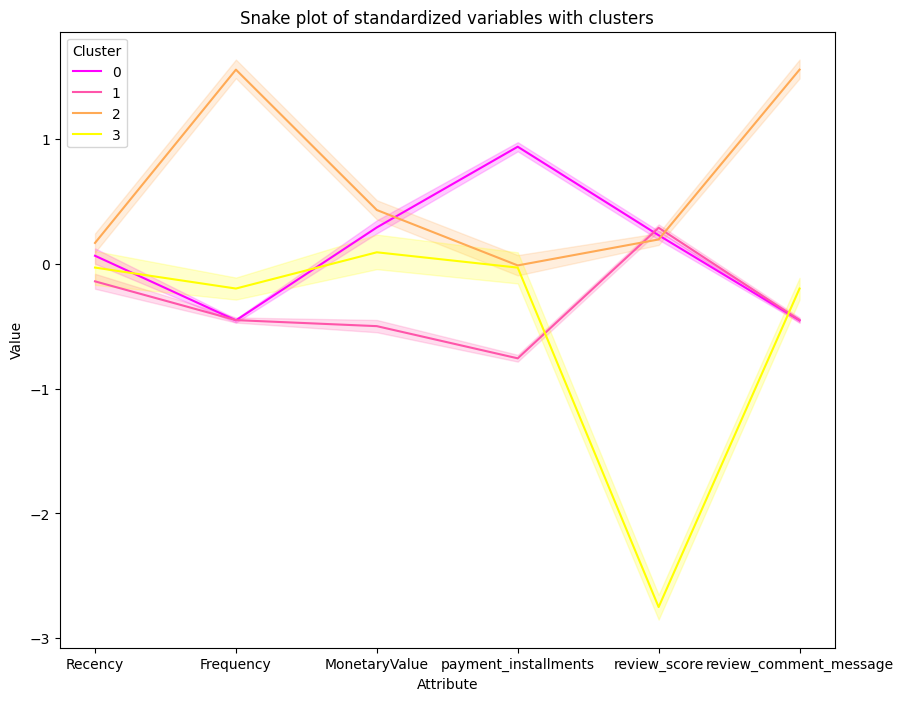

<Axes: title={'center': 'Snake plot of standardized variables'}, xlabel='Attribute', ylabel='Value'>

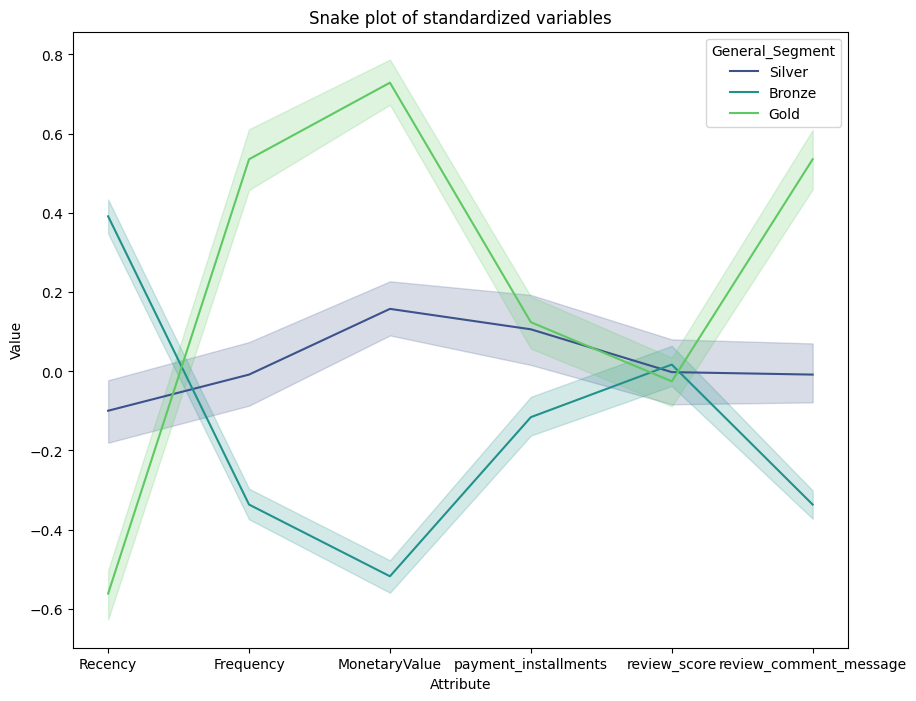

In [89]:
plt.figure(figsize = (10, 8))
plt.title('Snake plot of standardized variables with clusters')
plt.xlabel('Attribute')
plt.ylabel('Value')
sns.lineplot(x="Attribute", y="Value", hue='Cluster', data=data_melt, palette='spring')
plt.show()
plt.figure(figsize = (10, 8))
plt.title('Snake plot of standardized variables')
plt.xlabel('Attribute')
plt.ylabel('Value')
sns.lineplot(x="Attribute", y="Value", hue='General_Segment', data=data_melt_rfm_score, palette='viridis')


In [67]:
data_segment = data_normalized.assign(General_Segment = data['General_Segment'])
RFM['clusters'] = data['clusters']


C:\Users\litle\AppData\Local\Temp\ipykernel_19244\2803067917.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [75]:
cluster_avg = RFM.groupby(['clusters']).mean()
population_avg = RFM.mean()
relative_imp_cluster = cluster_avg / population_avg - 1
print(relative_imp_cluster.head())


segment_avg = data_segment.groupby(['General_Segment']).mean()

relative_imp_segment = segment_avg / population_avg - 1





          Frequency  MonetaryValue   Recency  clusters  payment_installments   
clusters                                                                       
0         -0.160251       0.038459  0.007656       NaN              0.858383  \
1         -0.159545      -0.065736 -0.016519       NaN             -0.692227   
2          0.550838       0.056837  0.019773       NaN             -0.011360   
3         -0.069977       0.012217 -0.003507       NaN             -0.027548   

          review_comment_message  review_score  
clusters                                        
0                      -0.160251      0.068263  
1                      -0.159545      0.086074  
2                       0.550838      0.058204  
3                      -0.069977     -0.818228  


In [76]:
relative_imp_cluster = relative_imp_cluster[['Recency', 'Frequency', 'MonetaryValue', 'payment_installments', 'review_score', 'review_comment_message']]
relative_imp_cluster.round(2)


relative_imp_segment = relative_imp_segment[['Recency', 'Frequency', 'MonetaryValue', 'payment_installments', 'review_score', 'review_comment_message']]
relative_imp_segment.round(2)

,Recency,Frequency,MonetaryValue,payment_installments,review_score,review_comment_message
General_Segment,,,,,,
Bronze,-0.93,-1.41,-1.09,-1.13,-0.99,-1.41
Gold,-1.10,-0.34,-0.87,-0.86,-1.02,-0.34
Silver,-1.02,-1.01,-0.97,-0.88,-1.00,-1.01


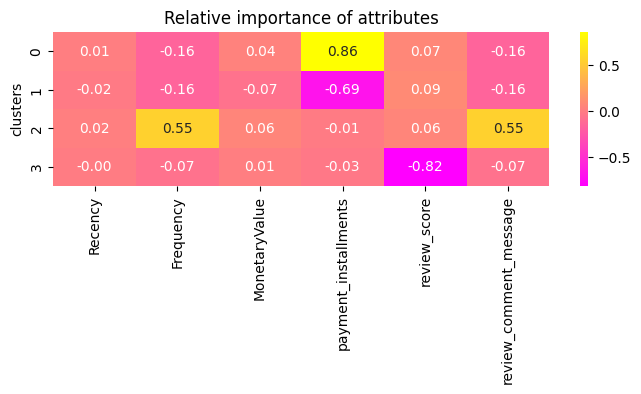

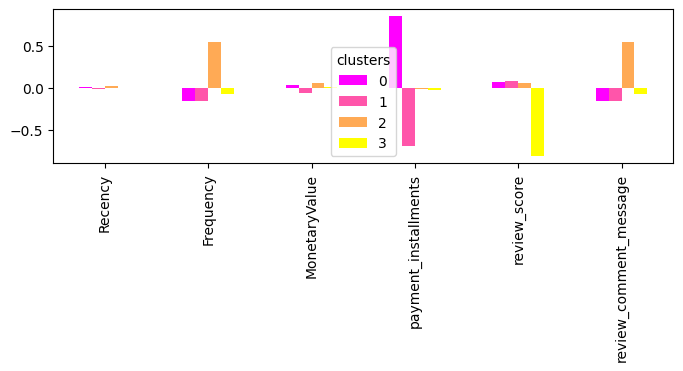

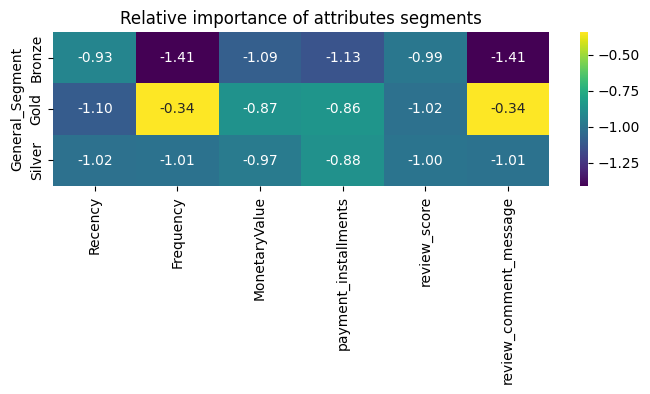

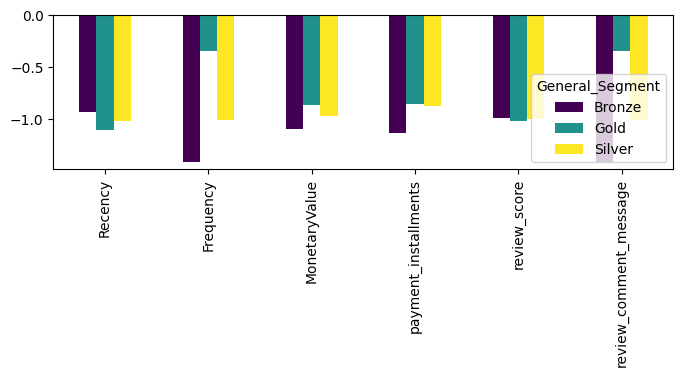

In [90]:
plt.figure(figsize=(8, 2))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp_cluster, annot=True, fmt='.2f', cmap='spring')
plt.show()
relative_imp_cluster.T.plot(kind='bar', figsize=(8, 2), cmap='spring')
plt.show()
plt.figure(figsize=(8, 2))
plt.title('Relative importance of attributes segments')
sns.heatmap(data=relative_imp_segment, annot=True, fmt='.2f', cmap='viridis')
plt.show()
relative_imp_segment.T.plot(kind='bar', figsize=(8, 2), cmap='viridis')
plt.show()
